## Machine Learning Foundations
# Supervised Machine Learning - Classification


In [1]:
import numpy as np
import pandas as pd
import os
import glob

# Data visualization
import matplotlib.pyplot as plt
from matplotlib import cm # Colomaps
import seaborn as sns
from sklearn import tree

# Classifier algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier #KNN

#train test split
from sklearn.model_selection import train_test_split

# Model evaluation
from sklearn import metrics

## Load Data

In [2]:
path = 'csv_files'

# Get a list of all CSV files in the directory
csv_files = glob.glob(os.path.join(path, "*.csv"))

# Read and combine all CSV files into a single DataFrame
dataframes = [pd.read_csv(file) for file in csv_files]
combined_dataframe = pd.concat(dataframes, ignore_index=True)

/tmp/ipykernel_146007/240971516.py:7: DtypeWarning: Columns (61) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes = [pd.read_csv(file) for file in csv_files]


In [3]:
combined_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169430 entries, 0 to 169429
Data columns (total 84 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow ID            169421 non-null  object 
 1   Src IP             169419 non-null  object 
 2   Src Port           169419 non-null  float64
 3   Dst IP             169419 non-null  object 
 4   Dst Port           169419 non-null  float64
 5   Protocol           169419 non-null  float64
 6   Timestamp          169419 non-null  object 
 7   Flow Duration      169419 non-null  float64
 8   Tot Fwd Pkts       169419 non-null  float64
 9   Tot Bwd Pkts       169419 non-null  float64
 10  TotLen Fwd Pkts    169419 non-null  float64
 11  TotLen Bwd Pkts    169419 non-null  float64
 12  Fwd Pkt Len Max    169419 non-null  float64
 13  Fwd Pkt Len Min    169419 non-null  float64
 14  Fwd Pkt Len Mean   169419 non-null  float64
 15  Fwd Pkt Len Std    169419 non-null  float64
 16  Bw

## Pre-processing Data

### Treat Duplicates Records

In [4]:
# identify duplicates
duplicates = combined_dataframe.loc[combined_dataframe.duplicated()]
duplicates

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
1439,10.45.0.1-10.120.141.22-0-0-17,10.120.141.22,0.0,10.45.0.1,0.0,17.0,19/04/2025 04:51:39 PM,448.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP_DDOS
1440,10.45.0.1-10.120.141.22-0-0-17,10.120.141.22,0.0,10.45.0.1,0.0,17.0,19/04/2025 04:51:39 PM,427.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP_DDOS
1448,10.45.0.1-10.120.141.22-0-0-17,10.120.141.22,0.0,10.45.0.1,0.0,17.0,19/04/2025 04:51:39 PM,469.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP_DDOS
1449,10.45.0.1-10.120.141.22-0-0-17,10.120.141.22,0.0,10.45.0.1,0.0,17.0,19/04/2025 04:51:39 PM,448.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP_DDOS
1451,10.45.0.1-10.120.141.22-0-0-17,10.120.141.22,0.0,10.45.0.1,0.0,17.0,19/04/2025 04:51:39 PM,457.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UDP_DDOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141024,10.152.144.62-10.42.0.64-2152-2152-17,10.152.144.62,2152.0,10.42.0.64,2152.0,17.0,08/04/2025 01:35:11 PM,38.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GTP_MALFORMED
141032,10.42.0.64-10.118.111.20-2152-2152-17,10.118.111.20,2152.0,10.42.0.64,2152.0,17.0,08/04/2025 01:35:11 PM,45.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GTP_MALFORMED
141036,10.149.15.25-10.42.0.64-2152-2152-17,10.149.15.25,2152.0,10.42.0.64,2152.0,17.0,08/04/2025 01:35:11 PM,70.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GTP_MALFORMED
141065,10.200.70.87-10.42.0.64-2152-2152-17,10.200.70.87,2152.0,10.42.0.64,2152.0,17.0,08/04/2025 01:35:11 PM,28.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GTP_MALFORMED


In [5]:
# Remove duplicates
combined_dataframe.drop_duplicates(keep='first', inplace=True)
combined_dataframe.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Flow ID,167590,54620,8.8.8.8-10.45.0.42-0-0-0,23813,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Src IP,167588,36405,10.45.0.32,45912,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Src Port,167588.0,NaN,NaN,NaN,8325.931594,14393.082122,0.0,53.0,2152.0,8080.0,65530.0
Dst IP,167588,70,10.45.0.42,45771,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dst Port,167588.0,NaN,NaN,NaN,3856.37051,10849.285432,0.0,53.0,2152.0,2152.0,60952.0
...,...,...,...,...,...,...,...,...,...,...,...
Idle Mean,167587.0,NaN,NaN,NaN,7267388.676421,19551342.235112,0.0,0.0,0.0,0.0,119943678.0
Idle Std,167587.0,NaN,NaN,NaN,1565024.475808,6966383.261587,0.0,0.0,0.0,0.0,75164731.712534
Idle Max,167587.0,NaN,NaN,NaN,8537570.832147,22157236.836584,0.0,0.0,0.0,0.0,119943678.0
Idle Min,167587.0,NaN,NaN,NaN,6088956.665672,18274481.693729,0.0,0.0,0.0,0.0,119943678.0


### Encoding (Category to Number)

In [6]:
class_names = combined_dataframe['Label'].unique()
class_names

array(['BENIGN', 'ICMP_DDOS', 'UDP_DDOS', 'GTP_REFLECTION', 'TCP_DDOS',
       'GTP_ENCAPSULATION', 'GTP_MALFORMED'], dtype=object)

In [7]:
# Assign numbers to class labels (label number by count)
combined_dataframe['y_act'] = combined_dataframe['Label']
combined_dataframe['y_act'].replace('BENIGN', 0, inplace=True)
combined_dataframe['y_act'].replace('ICMP_DDOS', 1, inplace=True)
combined_dataframe['y_act'].replace('UDP_DDOS', 2, inplace=True)
combined_dataframe['y_act'].replace('GTP_REFLECTION', 3, inplace=True)
combined_dataframe['y_act'].replace('TCP_DDOS', 4, inplace=True)
combined_dataframe['y_act'].replace('GTP_ENCAPSULATION', 5, inplace=True)
combined_dataframe['y_act'].replace('GTP_MALFORMED', 6, inplace=True)

combined_dataframe.sample(5)

/tmp/ipykernel_146007/1016703602.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_dataframe['y_act'].replace('BENIGN', 0, inplace=True)
/tmp/ipykernel_146007/1016703602.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,y_act
167171,10.42.0.64-10.54.174.125-2152-2152-17,10.54.174.125,2152.0,10.42.0.64,2152.0,17.0,08/04/2025 01:53:45 PM,24.0,0.0,2.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,GTP_MALFORMED,6
74568,10.45.0.32-10.45.0.42-8080-2507-6,10.45.0.32,8080.0,10.45.0.42,2507.0,6.0,20/04/2025 07:52:40 PM,4026462.0,3.0,1.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,TCP_DDOS,4
76348,10.45.0.32-10.45.0.42-8080-2305-6,10.45.0.32,8080.0,10.45.0.42,2305.0,6.0,20/04/2025 07:49:08 PM,96124895.0,5.0,1.0,...,37.5,16.263456,49.0,26.0,48062378.0,5.966321e+07,90250637.0,5874119.0,TCP_DDOS,4
73804,10.45.0.32-10.45.0.42-8080-1295-6,10.45.0.32,8080.0,10.45.0.42,1295.0,6.0,20/04/2025 07:44:58 PM,32124323.0,3.0,1.0,...,36.0,0.000000,36.0,36.0,32124260.0,0.000000e+00,32124260.0,32124260.0,TCP_DDOS,4
35577,8.8.8.8-10.45.0.42-0-0-0,10.45.0.42,0.0,8.8.8.8,0.0,0.0,20/04/2025 01:24:28 PM,116786.0,29.0,1.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000e+00,0.0,0.0,GTP_REFLECTION,3


In [8]:
# Provide replacement dictionary object to do the same above

combined_dataframe['y_act'] = combined_dataframe['Label']

replacements_dict = {'BENIGN':0,
                     'ICMP_DDOS':1,
                     'UDP_DDOS':2,
                     'GTP_REFLECTION':3,
                     'TCP_DDOS':4,
                     'GTP_ENCAPSULATION':5,
                     'GTP_MALFORMED':6}

combined_dataframe['y_act'].replace(replacements_dict, inplace=True)

combined_dataframe.sample(5)

/tmp/ipykernel_146007/1745178992.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_dataframe['y_act'].replace(replacements_dict, inplace=True)
/tmp/ipykernel_146007/1745178992.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_dataframe['y_act'].replace(replacements_dict, inpl

,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,y_act
41007,10.42.0.64-10.42.0.108-2152-2152-17,10.42.0.64,2152.0,10.42.0.108,2152.0,17.0,20/04/2025 01:30:07 PM,116398.0,34.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GTP_REFLECTION,3
131581,151.101.65.140-10.42.0.64-443-52424-6,151.101.65.140,443.0,10.42.0.64,52424.0,6.0,19/04/2025 10:31:06 PM,4914.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0
106242,10.45.0.32-10.45.0.42-8080-2223-6,10.45.0.32,8080.0,10.45.0.42,2223.0,6.0,20/04/2025 09:00:10 PM,52.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TCP_DDOS,4
40024,10.42.0.64-10.42.0.108-2152-2152-17,10.42.0.64,2152.0,10.42.0.108,2152.0,17.0,20/04/2025 01:29:07 PM,117892.0,19.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GTP_REFLECTION,3
125979,151.101.65.111-10.45.0.37-443-38964-6,151.101.65.111,443.0,10.45.0.37,38964.0,6.0,19/04/2025 09:42:09 PM,41.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,0


# Exploring Data

In [9]:
combined_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167592 entries, 0 to 169429
Data columns (total 85 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow ID            167590 non-null  object 
 1   Src IP             167588 non-null  object 
 2   Src Port           167588 non-null  float64
 3   Dst IP             167588 non-null  object 
 4   Dst Port           167588 non-null  float64
 5   Protocol           167588 non-null  float64
 6   Timestamp          167588 non-null  object 
 7   Flow Duration      167588 non-null  float64
 8   Tot Fwd Pkts       167588 non-null  float64
 9   Tot Bwd Pkts       167588 non-null  float64
 10  TotLen Fwd Pkts    167588 non-null  float64
 11  TotLen Bwd Pkts    167588 non-null  float64
 12  Fwd Pkt Len Max    167588 non-null  float64
 13  Fwd Pkt Len Min    167588 non-null  float64
 14  Fwd Pkt Len Mean   167588 non-null  float64
 15  Fwd Pkt Len Std    167588 non-null  float64
 16  Bwd Pkt

### Univariate Analysis

In [10]:
combined_dataframe.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Flow ID,167590,54620,8.8.8.8-10.45.0.42-0-0-0,23813,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Src IP,167588,36405,10.45.0.32,45912,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Src Port,167588.0,NaN,NaN,NaN,8325.931594,14393.082122,0.0,53.0,2152.0,8080.0,65530.0
Dst IP,167588,70,10.45.0.42,45771,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dst Port,167588.0,NaN,NaN,NaN,3856.37051,10849.285432,0.0,53.0,2152.0,2152.0,60952.0
...,...,...,...,...,...,...,...,...,...,...,...
Idle Std,167587.0,NaN,NaN,NaN,1565024.475808,6966383.261587,0.0,0.0,0.0,0.0,75164731.712534
Idle Max,167587.0,NaN,NaN,NaN,8537570.832147,22157236.836584,0.0,0.0,0.0,0.0,119943678.0
Idle Min,167587.0,NaN,NaN,NaN,6088956.665672,18274481.693729,0.0,0.0,0.0,0.0,119943678.0
Label,167592,7,GTP_REFLECTION,47788,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
combined_dataframe['Label'].value_counts()

Label
GTP_REFLECTION       47788
TCP_DDOS             45639
GTP_MALFORMED        30641
BENIGN               23772
UDP_DDOS             15496
GTP_ENCAPSULATION     3613
ICMP_DDOS              643
Name: count, dtype: int64

<Axes: ylabel='count'>

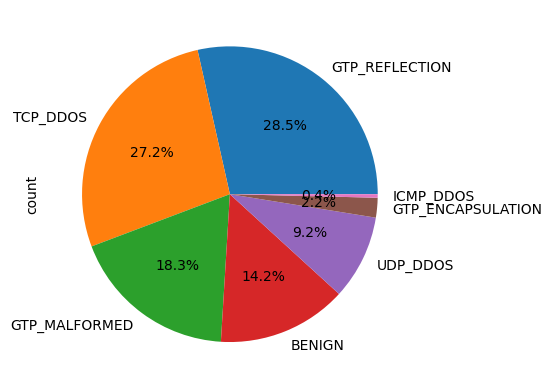

In [12]:
combined_dataframe['Label'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<Axes: xlabel='Label'>

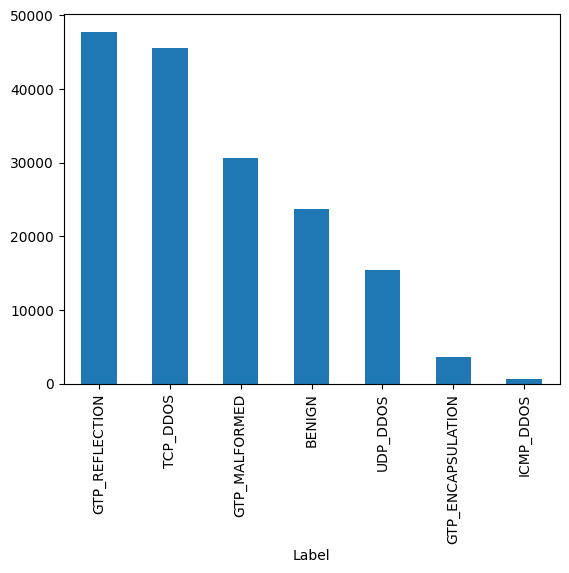

In [13]:
combined_dataframe['Label'].value_counts().plot(kind='bar')


### Finding Corelations

In [14]:
combined_dataframe.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE 

In [15]:

combined_dataframe = combined_dataframe.loc[:, combined_dataframe.nunique() > 1] # Remove columns where all values are the same
combined_dataframe = combined_dataframe.dropna() # Remove rows with NaN values

# Remove Src Port, Dst Port, and Protocol columns
combined_dataframe.drop(columns=['Src Port', 'Dst Port', 'Protocol'], inplace=True)
combined_dataframe.columns

# Display the updated DataFrame
len(combined_dataframe.columns.to_list())


69

In [16]:
# List columns which are not numeric
non_numeric_columns = combined_dataframe.select_dtypes(exclude=[np.number]).columns.tolist()
non_numeric_columns

# Drop non-numeric columns
combined_dataframe.drop(columns= non_numeric_columns, inplace=True)
# Display the updated DataFrame
len(combined_dataframe.columns.to_list())

63

### Correlation to y_act from other columns

Flow Duration      0.087282
Tot Fwd Pkts      -0.101689
Tot Bwd Pkts      -0.109612
TotLen Fwd Pkts   -0.067661
TotLen Bwd Pkts   -0.085974
                     ...   
Idle Mean          0.116327
Idle Std           0.068842
Idle Max           0.118270
Idle Min           0.105434
y_act              1.000000
Name: y_act, Length: 63, dtype: float64


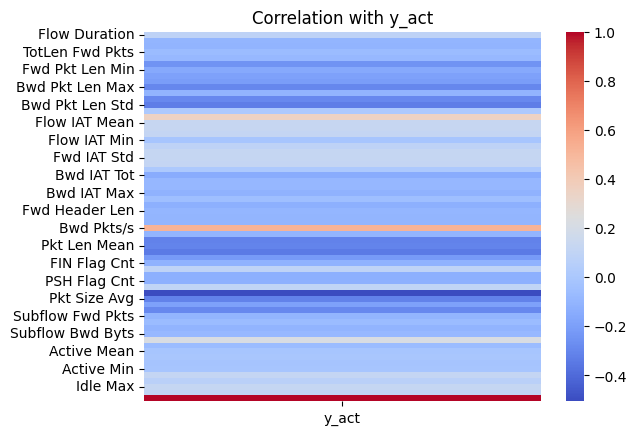

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation of all columns with 'y_act'
correlation_with_y_act = combined_dataframe.corr()['y_act']

# Display the correlation values
print(correlation_with_y_act)

# Visualize the correlation of all columns with 'y_act' as a heatmap
sns.heatmap(correlation_with_y_act.to_frame(), annot=False, cmap='coolwarm', cbar=True)
plt.title("Correlation with y_act")
plt.show()

## Preparing for Machine Learning Model training

### Identify features (`X`) and target variable (`y`)

In [18]:
X_variables = combined_dataframe.drop(columns=['y_act']).columns.to_list()
combined_dataframe[X_variables].head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Init Bwd Win Byts,Fwd Act Data Pkts,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,110017245.0,21.0,23.0,336.0,368.0,16.0,16.0,16.0,0.0,16.0,...,-1.0,21.0,5.470000e+02,2.067210e+02,915.0,204.0,1.100113e+07,6.073438e+02,11002064.0,11000272.0
1,96547055.0,2007.0,1146.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,7.770288e+05,1.636446e+06,4114285.0,44185.0,1.462697e+07,8.250887e+06,29919867.0,5970662.0
2,94521046.0,1729.0,1011.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,1.042477e+05,5.465302e+04,168167.0,30357.0,1.338523e+07,4.754897e+06,18058412.0,5984472.0
3,110080090.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,1.792530e+06,2.533707e+06,3584131.0,928.0,2.129901e+07,1.199961e+07,33278993.0,7167824.0
4,116639671.0,1858.0,1203.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,1.695347e+06,2.190206e+06,4124941.0,62592.0,2.120951e+07,1.151275e+07,34087026.0,5926148.0


In [19]:
y_varibale = 'y_act'
combined_dataframe[y_varibale].head()

0    0
1    1
2    1
3    0
4    1
Name: y_act, dtype: int64

In [20]:
# Classes (y variable)
combined_dataframe[y_varibale].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [21]:
#class_names to number map from the `replacements_dict` created above
replacements_dict

{'BENIGN': 0,
 'ICMP_DDOS': 1,
 'UDP_DDOS': 2,
 'GTP_REFLECTION': 3,
 'TCP_DDOS': 4,
 'GTP_ENCAPSULATION': 5,
 'GTP_MALFORMED': 6}

In [22]:
# Convert Features Data Frame to 2D Numpy array (optional)
X = combined_dataframe[X_variables].values
X[:5]

array([[ 1.10017245e+08,  2.10000000e+01,  2.30000000e+01,
         3.36000000e+02,  3.68000000e+02,  1.60000000e+01,
         1.60000000e+01,  1.60000000e+01,  0.00000000e+00,
         1.60000000e+01,  1.60000000e+01,  1.60000000e+01,
         0.00000000e+00,  6.39899681e+00,  3.99937301e-01,
         2.55854058e+06,  4.70249318e+06,  1.10020640e+07,
         4.40000000e+01,  1.10016615e+08,  5.50083075e+06,
         5.64326185e+06,  1.10020640e+07,  1.74000000e+02,
         1.10017118e+08,  5.00077809e+06,  5.60681514e+06,
         1.10025880e+07,  4.40000000e+01,  0.00000000e+00,
         1.68000000e+02,  1.84000000e+02,  1.90879166e-01,
         2.09058134e-01,  1.60000000e+01,  1.60000000e+01,
         1.60000000e+01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         1.63636364e+01,  1.60000000e+01,  1.60000000e+01,
         2.10000000e+01,  3.36000000e+02,  2.30000000e+0

In [23]:
# Convert Target Column (Series) to  to 1D Numpy array (optional)
y = combined_dataframe[y_varibale].values
y[:5]

array([0, 1, 1, 0, 1])

In [24]:
#Direcly use Features ad DataFrame and Target Column as a Series in Model Trainig
X = combined_dataframe[X_variables]
X.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Init Bwd Win Byts,Fwd Act Data Pkts,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,110017245.0,21.0,23.0,336.0,368.0,16.0,16.0,16.0,0.0,16.0,...,-1.0,21.0,5.470000e+02,2.067210e+02,915.0,204.0,1.100113e+07,6.073438e+02,11002064.0,11000272.0
1,96547055.0,2007.0,1146.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,7.770288e+05,1.636446e+06,4114285.0,44185.0,1.462697e+07,8.250887e+06,29919867.0,5970662.0
2,94521046.0,1729.0,1011.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,1.042477e+05,5.465302e+04,168167.0,30357.0,1.338523e+07,4.754897e+06,18058412.0,5984472.0
3,110080090.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,1.792530e+06,2.533707e+06,3584131.0,928.0,2.129901e+07,1.199961e+07,33278993.0,7167824.0
4,116639671.0,1858.0,1203.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,1.695347e+06,2.190206e+06,4124941.0,62592.0,2.120951e+07,1.151275e+07,34087026.0,5926148.0


In [25]:
y = combined_dataframe[y_varibale]
y.head()

0    0
1    1
2    1
3    0
4    1
Name: y_act, dtype: int64

## Train Test Split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(F"Train sample size = {len(X_train)}")
print(F"Test sample size  = {len(X_test)}")

Train sample size = 134069
Test sample size  = 33518


<hr>

## Create Logistic Regression Model
* https://en.wikipedia.org/wiki/Logistic_regression
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [27]:
model = LogisticRegression()

## Train Model (use Training dataset)

In [28]:
model.fit(X_train, y_train)

/home/swengapp23/OneDrive/project_researcher/classification_analysis/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Accesing Model Attributes

In [29]:
# Get class lables order used by the model to understand the outputs
model.classes_

array([0, 1, 2, 3, 4, 5, 6])

In [30]:
# Variable coefficenits of one vs. all models for each class (3 models here)
model.coef_

array([[ 1.40775258e-05, -4.43060969e-09,  6.43984879e-09,
         6.88610783e-06,  1.03730333e-05,  1.82869635e-08,
        -4.54294491e-10,  3.77337232e-09,  5.67732589e-09,
         6.06257513e-08, -3.25769869e-09,  2.16389938e-08,
         2.41993175e-08,  3.06968388e-05, -8.52924821e-06,
         1.50342467e-06,  2.39832574e-06,  1.43051546e-06,
         5.02674772e-09,  9.62927066e-06,  4.80736755e-06,
         7.65037362e-06, -3.23121997e-06, -2.28969790e-06,
        -1.44449568e-06,  3.93371797e-06,  8.40559277e-06,
         5.04036016e-06, -4.52081521e-07,  9.15682624e-12,
         1.56014356e-07,  2.40940561e-07,  3.18801974e-06,
        -1.17171985e-05, -3.50676973e-09,  6.63606533e-08,
         1.40580968e-08,  2.43279632e-08,  1.07822438e-05,
         1.43617702e-11, -2.66755499e-11,  1.80216688e-11,
         9.15682624e-12,  2.64498238e-11,  4.63722229e-10,
         1.57926440e-08,  3.77337232e-09,  2.16389938e-08,
        -4.43060969e-09,  6.88610783e-06,  6.43984879e-0

In [31]:
# Intercepts of one vs. all models for each class (3 models here)
model.intercept_

array([-4.52805935e-10, -2.74635147e-10,  2.08418418e-10,  7.11258442e-10,
       -4.35326365e-11, -1.19599641e-10, -2.91034997e-11])

In [32]:
# Get feeture names (column names if you provide Data Frame)
model.feature_names_in_

array(['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts',
       'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min',
       'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max',
       'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std',
       'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std',
       'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean',
       'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot',
       'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min',
       'Bwd PSH Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'Down/Up Ratio',
       'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg',
       'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts',
       'Subflow Bwd Byts', 'Init Bwd Win Byt

## Predict (use Testing dataset)

In [33]:
# Probability -> Return 2D Numpy array (Columns are probality for each class, Rows are the records)
model.predict_proba(X_test)[:5]

array([[3.89001924e-001, 1.96348854e-004, 2.26503511e-004,
        3.51901685e-004, 3.38996838e-004, 2.17174440e-003,
        6.07712581e-001],
       [1.60319582e-001, 1.35902183e-001, 1.24497060e-001,
        1.62054956e-001, 1.70791302e-001, 1.22234736e-001,
        1.24200180e-001],
       [3.16523879e-002, 4.08944018e-002, 4.41153512e-002,
        4.14383558e-002, 7.15973089e-001, 4.12589998e-002,
        8.46674143e-002],
       [3.16729641e-001, 7.32407494e-007, 9.38758258e-007,
        1.97983855e-006, 1.86779064e-006, 4.47787495e-005,
        6.83220062e-001],
       [3.45925965e-005, 0.00000000e+000, 0.00000000e+000,
        7.00779023e-292, 9.99965407e-001, 0.00000000e+000,
        0.00000000e+000]])

In [34]:
# Predicted Class
model.predict(X_test)[:5]

array([6, 4, 4, 6, 4])

## Creating Results DataFrame

### Get Predicted Probabilities of all three classes

In [35]:
y_pred_prob_0 = model.predict_proba(X_test)[:, 0]
y_pred_prob_1 = model.predict_proba(X_test)[:, 1]
y_pred_prob_2 = model.predict_proba(X_test)[:, 2]
y_pred_prob_3 = model.predict_proba(X_test)[:, 3]
y_pred_prob_4 = model.predict_proba(X_test)[:, 4]
y_pred_prob_5 = model.predict_proba(X_test)[:, 5]
y_pred_prob_6 = model.predict_proba(X_test)[:, 6]

# class 0 probability
y_pred_prob_0

array([0.38900192, 0.16031958, 0.03165239, ..., 1.        , 0.16123763,
       0.21813255], shape=(33518,))

In [36]:
y_pred = model.predict(X_test)
y_pred

array([6, 4, 4, ..., 0, 6, 3], shape=(33518,))

### Create Results Data Frame for Test Sample

In [37]:
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob_0':y_pred_prob_0 , 'y_pred_prob_1':y_pred_prob_1, 'y_pred_prob_2':y_pred_prob_2, 'y_pred_prob_3':y_pred_prob_3, 'y_pred_prob_4':y_pred_prob_4, 'y_pred_prob_5':y_pred_prob_5, 'y_pred_prob_6':y_pred_prob_6})
# Display a random sample of 10 rows from the test result DataFrame
test_result.sample(10)

,y_act,y_pred,y_pred_prob_0,y_pred_prob_1,y_pred_prob_2,y_pred_prob_3,y_pred_prob_4,y_pred_prob_5,y_pred_prob_6
107210,4,4,0.037342,4.645487e-02,4.950931e-02,4.698995e-02,6.883372e-01,4.682289e-02,8.454360e-02
34693,3,3,0.311606,1.335171e-02,1.844397e-03,3.539876e-01,3.166831e-01,1.402345e-03,1.125313e-03
125806,0,0,0.923803,8.374034e-26,2.017405e-25,5.884956e-24,1.439300e-25,4.128765e-18,7.619735e-02
104215,4,4,0.000012,6.125772e-50,4.859328e-58,1.531684e-03,9.984567e-01,2.532267e-60,1.138931e-62
51985,3,3,0.339452,9.903182e-03,1.124531e-03,3.592823e-01,2.884451e-01,9.212455e-04,8.720543e-04
124519,0,3,0.145375,1.450423e-01,1.368085e-01,1.515991e-01,1.440385e-01,1.362543e-01,1.408824e-01
45329,3,3,0.278386,1.197180e-02,1.455925e-03,3.882929e-01,3.179144e-01,1.105042e-03,8.738327e-04
130948,0,3,0.279678,5.787745e-02,5.113898e-02,2.822836e-01,2.213600e-01,5.154715e-02,5.611483e-02
48531,3,0,0.398813,1.066857e-02,1.430804e-03,3.120951e-01,2.745532e-01,1.208322e-03,1.231432e-03
157135,6,6,0.366547,3.527284e-05,4.203875e-05,7.172963e-05,6.867463e-05,6.604044e-04,6.325748e-01


In [38]:
#one-hot encode prediction column
dummy_column = pd.get_dummies(test_result['y_pred'], prefix='y_pred', drop_first=False, dummy_na=False)
test_result = pd.concat([test_result, dummy_column], join='outer', axis=1)
test_result.head()

,y_act,y_pred,y_pred_prob_0,y_pred_prob_1,y_pred_prob_2,y_pred_prob_3,y_pred_prob_4,y_pred_prob_5,y_pred_prob_6,y_pred_0,y_pred_1,y_pred_3,y_pred_4,y_pred_6
147364,6,6,0.389002,1.963489e-04,2.265035e-04,3.519017e-04,0.000339,0.002172,0.607713,False,False,False,False,True
9801,2,4,0.160320,1.359022e-01,1.244971e-01,1.620550e-01,0.170791,0.122235,0.124200,False,False,False,True,False
109785,4,4,0.031652,4.089440e-02,4.411535e-02,4.143836e-02,0.715973,0.041259,0.084667,False,False,False,True,False
168627,6,6,0.316730,7.324075e-07,9.387583e-07,1.979839e-06,0.000002,0.000045,0.683220,False,False,False,False,True
87722,4,4,0.000035,0.000000e+00,0.000000e+00,7.007790e-292,0.999965,0.000000,0.000000,False,False,False,True,False


## Evaluating Model

### Confusion Matrix

In [39]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,0,1,3,4,6,All
y_act,,,,,,
0,3610,0,443,554,289,4896
1,4,101,14,1,0,120
2,0,0,1,2998,0,2999
3,2580,0,6959,37,0,9576
4,15,0,3,9136,0,9154
5,688,0,0,0,0,688
6,0,0,0,0,6085,6085
All,6897,101,7420,12726,6374,33518


### Accuracy

In [40]:
# Calculate accuracy from the diagonal elements of the confusion matrix
diagonal_sum = cfm.values.diagonal().sum()  # Sum of diagonal elements
total_sum = cfm.values.sum()  # Total sum of all elements in the confusion matrix

# Calculate accuracy
accuracy = diagonal_sum / total_sum
accuracy

np.float64(0.0330941583626708)

In [41]:
# Use Scikit-Learn function (lgr = Logistic Regression)
acuracy_lgr = metrics.accuracy_score(test_result['y_act'], test_result['y_pred'])
acuracy_lgr

0.7724506235455576

### F1 Score

In [42]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
f1_score_lgr = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
f1_score_lgr

0.7320629052557498

<hr>

# Decision Tree Classifier
* Use same training and testing datasets

In [43]:
# Create model object
model = DecisionTreeClassifier(random_state=0, max_depth=10, min_samples_split=2)

# Train Model
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

## Visualize Decision Tree

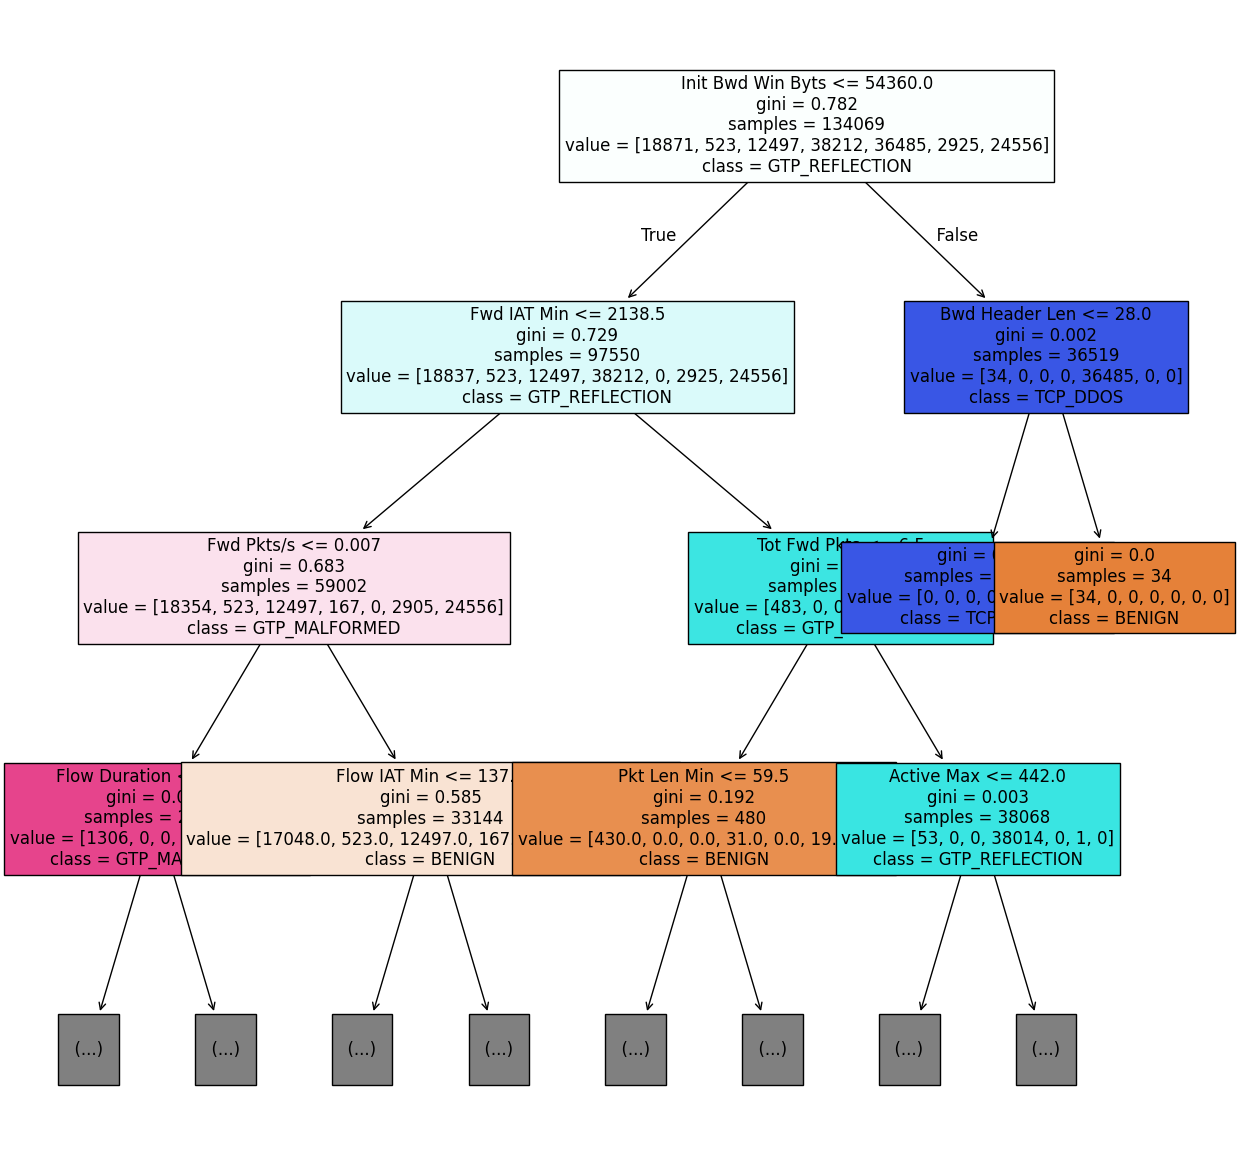

In [44]:
pfig = plt.figure(figsize=(15,15))
tree.plot_tree(model, feature_names=X_variables, class_names=class_names, filled=True, max_depth=3, fontsize=12)
plt.show()

In [45]:
# Predict on Testing Data

# probabilities
y_pred_prob_0 = model.predict_proba(X_test)[:, 0]
y_pred_prob_1 = model.predict_proba(X_test)[:, 1]
y_pred_prob_2 = model.predict_proba(X_test)[:, 2]
y_pred_prob_3 = model.predict_proba(X_test)[:, 3]
y_pred_prob_4 = model.predict_proba(X_test)[:, 4]
y_pred_prob_5 = model.predict_proba(X_test)[:, 5]
y_pred_prob_6 = model.predict_proba(X_test)[:, 6]

# Prediction
y_pred = model.predict(X_test)

# Results table
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob_0':y_pred_prob_0 , 'y_pred_prob_1':y_pred_prob_1, 'y_pred_prob_2':y_pred_prob_2})
dummy_column = pd.get_dummies(test_result['y_pred'], prefix='y_pred', drop_first=False, dummy_na=False)
test_result = pd.concat([test_result, dummy_column], join='outer', axis=1)
test_result.head()

,y_act,y_pred,y_pred_prob_0,y_pred_prob_1,y_pred_prob_2,y_pred_0,y_pred_1,y_pred_2,y_pred_3,y_pred_4,y_pred_5,y_pred_6
147364,6,6,0.0,0.0,0.0,False,False,False,False,False,False,True
9801,2,2,0.0,0.0,1.0,False,False,True,False,False,False,False
109785,4,4,0.0,0.0,0.0,False,False,False,False,True,False,False
168627,6,6,0.0,0.0,0.0,False,False,False,False,False,False,True
87722,4,4,0.0,0.0,0.0,False,False,False,False,True,False,False


In [46]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,0,1,2,3,4,5,6,All
y_act,,,,,,,,
0,4886,0,0,9,0,0,1,4896
1,0,120,0,0,0,0,0,120
2,0,0,2999,0,0,0,0,2999
3,13,0,0,9563,0,0,0,9576
4,0,0,0,0,9154,0,0,9154
5,0,0,0,0,0,688,0,688
6,0,0,0,0,0,0,6085,6085
All,4899,120,2999,9572,9154,688,6086,33518


In [47]:
# tc = Tree classifer
acuracy_tc = metrics.accuracy_score(test_result['y_act'], test_result['y_pred'])
acuracy_tc

0.9993138015394714

In [48]:
f1_score_tc = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')
f1_score_tc

0.9993138392922114

# Random Forest Classifier

In [49]:
# Create model object
model = RandomForestClassifier(n_estimators=100, random_state=0, max_depth=10, min_samples_split=2)

# Train Model
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [50]:
# Predict on Testing Data

# probabilities
y_pred_prob_0 = model.predict_proba(X_test)[:, 0]
y_pred_prob_1 = model.predict_proba(X_test)[:, 1]
y_pred_prob_2 = model.predict_proba(X_test)[:, 2]
y_pred_prob_3 = model.predict_proba(X_test)[:, 3]
y_pred_prob_4 = model.predict_proba(X_test)[:, 4]
y_pred_prob_5 = model.predict_proba(X_test)[:, 5]
y_pred_prob_6 = model.predict_proba(X_test)[:, 6]

# Prediction
y_pred = model.predict(X_test)

# Results table
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob_0':y_pred_prob_0 , 'y_pred_prob_1':y_pred_prob_1, 'y_pred_prob_2':y_pred_prob_2})
dummy_column = pd.get_dummies(test_result['y_pred'], prefix='y_pred', drop_first=False, dummy_na=False)
test_result = pd.concat([test_result, dummy_column], join='outer', axis=1)
test_result.head()

,y_act,y_pred,y_pred_prob_0,y_pred_prob_1,y_pred_prob_2,y_pred_0,y_pred_1,y_pred_2,y_pred_3,y_pred_4,y_pred_5,y_pred_6
147364,6,6,0.000000,0.0,0.000000,False,False,False,False,False,False,True
9801,2,2,0.000180,0.0,0.999793,False,False,True,False,False,False,False
109785,4,4,0.000199,0.0,0.000000,False,False,False,False,True,False,False
168627,6,6,0.000000,0.0,0.000000,False,False,False,False,False,False,True
87722,4,4,0.000004,0.0,0.000000,False,False,False,False,True,False,False


In [51]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,0,1,2,3,4,5,6,All
y_act,,,,,,,,
0,4894,0,1,1,0,0,0,4896
1,0,120,0,0,0,0,0,120
2,2,0,2997,0,0,0,0,2999
3,13,0,2,9561,0,0,0,9576
4,0,0,0,0,9154,0,0,9154
5,0,0,0,0,0,688,0,688
6,0,0,0,0,0,0,6085,6085
All,4909,120,3000,9562,9154,688,6085,33518


In [52]:
# rf = Random Forest classifer
acuracy_rf = metrics.accuracy_score(test_result['y_act'], test_result['y_pred'])
acuracy_rf

0.999433140402172

In [53]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html
f1_score_rf = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
f1_score_rf

0.999433314465818

# Support Vector Machines
* https://en.wikipedia.org/wiki/Support-vector_machine
* https://scikit-learn.org/stable/modules/svm.html

In [ ]:
# Create model object
model = svm.SVC(kernel='linear', C=1.0, probability=True)

# Train Model
model.fit(X_train, y_train)

In [ ]:
# Predict on Testing Data

# probabilities
y_pred_prob_0 = model.predict_proba(X_test)[:, 0]
y_pred_prob_1 = model.predict_proba(X_test)[:, 1]
y_pred_prob_2 = model.predict_proba(X_test)[:, 2]
y_pred_prob_3 = model.predict_proba(X_test)[:, 3]
y_pred_prob_4 = model.predict_proba(X_test)[:, 4]
y_pred_prob_5 = model.predict_proba(X_test)[:, 5]
y_pred_prob_6 = model.predict_proba(X_test)[:, 6]

# Prediction
y_pred = model.predict(X_test)

# Results table
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob_0':y_pred_prob_0 , 'y_pred_prob_1':y_pred_prob_1, 'y_pred_prob_2':y_pred_prob_2})
dummy_column = pd.get_dummies(test_result['y_pred'], prefix='y_pred', drop_first=False, dummy_na=False)
test_result = pd.concat([test_result, dummy_column], join='outer', axis=1)
test_result.head()

,y_act,y_pred,y_pred_prob_0,y_pred_prob_1,y_pred_prob_2,y_pred_0,y_pred_1,y_pred_2
127,1,1,0.021859,0.678361,0.299780,0,1,0
53,2,2,0.013628,0.026722,0.959651,0,0,1
140,1,1,0.006817,0.989836,0.003347,0,1,0
19,0,0,0.967490,0.013055,0.019455,1,0,0
106,1,1,0.056113,0.725866,0.218021,0,1,0


In [ ]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,0,1,2,All
y_act,,,,
0,11,0,0,11
1,0,9,0,9
2,0,1,9,10
All,11,10,9,30


In [ ]:
acuracy_svm = metrics.accuracy_score(test_result['y_act'], test_result['y_pred'])
acuracy_svm

0.9666666666666667

In [ ]:
f1_score_svm = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
f1_score_svm

0.9666666666666667

# K-Neighbors Classifier
* https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


In [ ]:
# Create model object
model = KNeighborsClassifier(n_neighbors=5)

# Train Model
model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Predict on Testing Data

# probabilities
y_pred_prob_0 = model.predict_proba(X_test)[:, 0]
y_pred_prob_1 = model.predict_proba(X_test)[:, 1]
y_pred_prob_2 = model.predict_proba(X_test)[:, 2]

# Prediction
y_pred = model.predict(X_test)

# Results table
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob_0':y_pred_prob_0 , 'y_pred_prob_1':y_pred_prob_1, 'y_pred_prob_2':y_pred_prob_2})
dummy_column = pd.get_dummies(test_result['y_pred'], prefix='y_pred', drop_first=False, dummy_na=False)
test_result = pd.concat([test_result, dummy_column], join='outer', axis=1)
test_result.head()

,y_act,y_pred,y_pred_prob_0,y_pred_prob_1,y_pred_prob_2,y_pred_0,y_pred_1,y_pred_2
127,1,1,0.0,0.8,0.2,0,1,0
53,2,2,0.0,0.0,1.0,0,0,1
140,1,1,0.0,1.0,0.0,0,1,0
19,0,0,1.0,0.0,0.0,1,0,0
106,1,2,0.0,0.2,0.8,0,0,1


In [ ]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,0,1,2,All
y_act,,,,
0,11,0,0,11
1,0,8,1,9
2,0,1,9,10
All,11,9,10,30


In [ ]:
acuracy_knn = metrics.accuracy_score(test_result['y_act'], test_result['y_pred'])
acuracy_knn

0.9333333333333333

In [ ]:
f1_score_knn = metrics.f1_score(test_result['y_act'], test_result['y_pred'], average='weighted')  #weighted accounts for label imbalance.
f1_score_knn

0.9333333333333333

# Tabulating Model Perfomance

In [ ]:
pd.DataFrame([{'model':'lgr', 'acuracy':acuracy_lgr, 'f1':f1_score_lgr},
              {'model':'tc', 'acuracy':acuracy_tc, 'f1':f1_score_tc},
              {'model':'rf', 'acuracy':acuracy_rf, 'f1':f1_score_rf},
              {'model':'svm', 'acuracy':acuracy_svm, 'f1':f1_score_svm},
              {'model':'knn', 'acuracy':acuracy_knn, 'f1':f1_score_knn}]
             )


,model,acuracy,f1
0,lgr,0.933333,0.933333
1,tc,0.933333,0.933333
2,rf,0.933333,0.933333
3,svm,0.966667,0.966667
4,knn,0.933333,0.933333


<hr>
Last update 2022-04-09 by Sumudu Tennakoon

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.